In [55]:
import pandas as pd 
import json 
import utils 
from collections import defaultdict
import glob
import os

In [75]:
def calculate_accuracy(results_dir):
    results = defaultdict(list)
    for file_path in glob.glob(results_dir):
        data = pd.DataFrame(utils.load_json(file_path))
        for i, row in data.iterrows():
            results[row['name']].append(row['pass'])
    
    perf = {name: sum(result)/len(result) for name, result in results.items()}
    return perf,results


In [91]:
performance,_ = calculate_accuracy('./outputs/demo_google_claude_3.5_sonnet_v2_2024-12-06*')
performance_retry2,_ = calculate_accuracy('./outputs/demo_google_claude_3.5_sonnet_v2_2024-12-04*')

In [89]:
concat_results = {}
for name, p in perf.items():
    concat_results[name] = (p, perf_retry2[name])

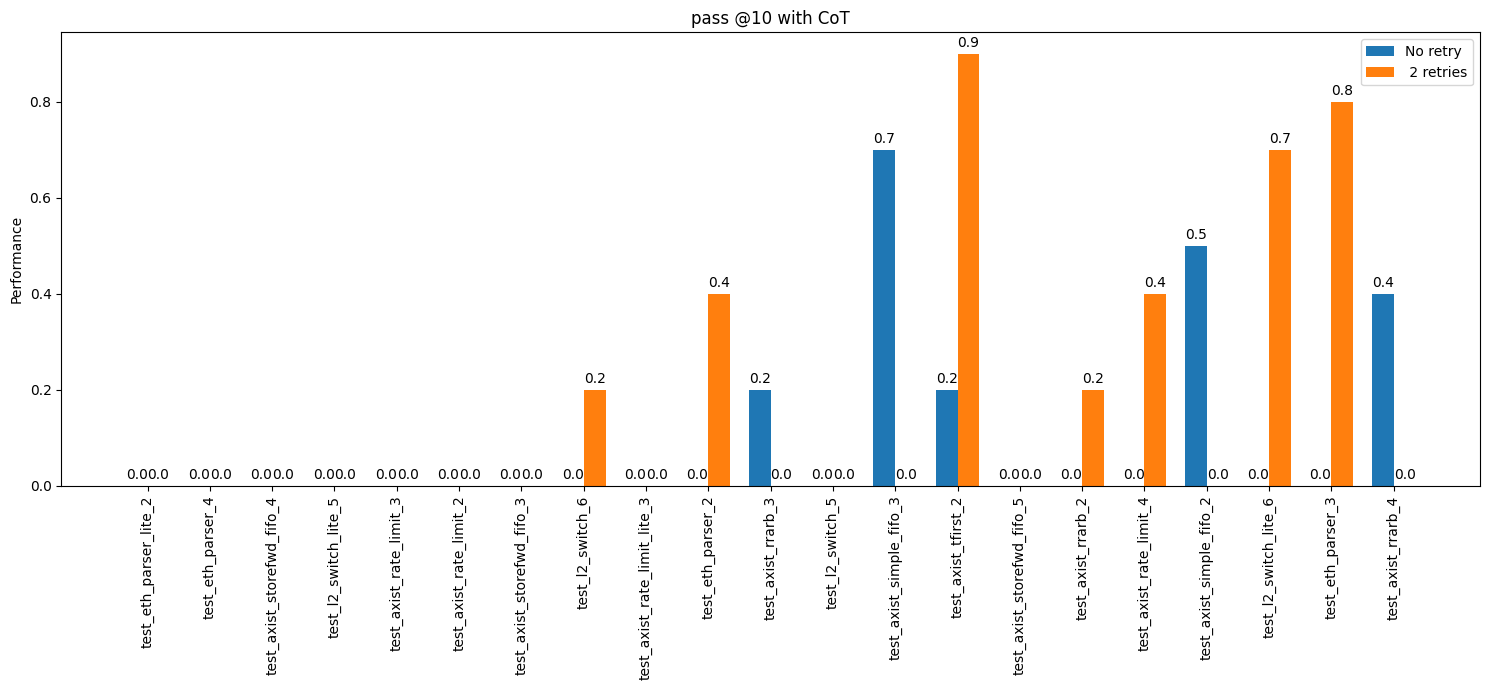

In [98]:
import matplotlib.pyplot as plt
# Extract keys and values for plotting
categories = list(performance.keys())


# Separate the tuple values into two separate lists for plotting
values1 = [val for val in performance.values()]
values2 = [val for val in performance_retry2.values()]

# Plotting the bar plot
x = range(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x, values1, width, label='No retry')
rects2 = ax.bar([p + width for p in x], values2, width, label=' 2 retries')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance')
ax.set_title('pass @10 with CoT')
ax.set_xticks([p + width / 2 for p in x])
# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)
ax.set_xticklabels(categories)
ax.legend()

# Function to add labels on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

# Show plot
plt.tight_layout()
plt.show()

In [65]:
file_path = "./outputs/demo_google_claude_3.5_sonnet_v2_2024-12-06_5.json"
data = pd.DataFrame(utils.load_json(file_path))
for i, row in data.iterrows():
    print(f'The problem {row['name']} test results : {row['pass']}')
    # print(f'The problem {row['name']} test results : {row['stderr']}')
    print('-' * 20)
    

The problem test_eth_parser_lite_2 test results : False
--------------------
The problem test_eth_parser_4 test results : False
--------------------
The problem test_axist_storefwd_fifo_4 test results : False
--------------------
The problem test_l2_switch_lite_5 test results : False
--------------------
The problem test_axist_rate_limit_3 test results : False
--------------------
The problem test_axist_rate_limit_2 test results : False
--------------------
The problem test_axist_storefwd_fifo_3 test results : False
--------------------
The problem test_l2_switch_6 test results : False
--------------------
The problem test_axist_rate_limit_lite_3 test results : False
--------------------
The problem test_eth_parser_2 test results : False
--------------------
The problem test_axist_rrarb_3 test results : False
--------------------
The problem test_l2_switch_5 test results : False
--------------------
The problem test_axist_simple_fifo_3 test results : True
--------------------
The probl

In [78]:
name = 'test_axist_storefwd_fifo_3'
steps = data[data['name'] == name]['conversation'].values[0].split('\n [NEW STEP]\n')
for step in steps:
    print(step)
    print('-' *30)

Problem description:
    Create a SystemVerilog module that acts as a store-and-forward ready/valid FIFO for an AXI4 Stream protocol. The FIFO should support a parameterized number of entries (Depth) and a parameterized type for the input and output data (AxiStreamType). If Depth is 0, the FIFO should be bypassed and output data = input data. Depth of 1 is not supported. If there is not enough free in the FIFO to store an incoming frame, then the frame must be dropped, this is determined by the Maximum Transfer Unit (MTU) size, based on a parameter EntriesMTU.
-- In the AXI Stream protocol, a packet (or frame) is valid from the first data phit (following reset=1 or a previous tvalid=1=tlast) until the last data phit (tvalid=1=tlast). When transmitting a frame, this module cannot re-arbitrate until the last data phit (tvalid=1=tlast) is transferred on the input.
-- The module has inputs clock and reset, where reset is a synchronous reset.
-- The module name should be: dut
-- Module para

In [46]:
steps = data[data['name'] == name]['convers
steps

,index,dut,conversation,tb,name,return_code,stdout,stderr,pass,score,...,batch_uuid,dut_name,tb_name,sim_tool,pass_string,compile_only,timeout,dir,start_time,stop_time
3,0,module dut #(\n parameter type AxiStreamTyp...,Problem description:\n ======\n Create a...,// (Start -- create_tests_jsonl.py -- header t...,test_eth_parser_lite_2,0,,%Error-BLKANDNBLK: tb.sv:3977:27: Unsupported:...,False,60,...,f6ad12e5-8857-4a63-bf77-62f1aabda5cf,dut,tb,verilator,TEST PASS,False,60,work/job_f6ad12e5-8857-4a63-bf77-62f1aabda5cf_3,1.733360e+09,1.733360e+09
